# Popular Data Science Questions

In this project, we are going to imagine a scenario in which we are a company that produces data science content.  This content includes things like books, articles and blogs, videos, podcasts, tutorials, etc.  

Let's consider the question: _what topics should we be creating content for?  What is the best content to produce?_

Evidently "best" is subjective here, so let's take it to mean "what people want to learn about the most".  How could we find out what people are curious and want to learn about?  What kind of topics should our content treat so that we can help as many people as possible?

[Data Science Stack Exchange](https://datascience.stackexchange.com/) is a question-and-answer website for topics related to data science.  We're going to do some research with this website to see if we can use it to find out what people want to learn about in the world of data science.

## Exploring Data Science Stack Exchange (DSSE)

What kind of questions are welcome on the site?  The topics of conversation are very diverse, covering things like:
   * programming languages such as Python and R;
   * particular activities such as data mining machine learning;
   * statistical concepts such as regression and time series; 
   * and many more.

The website's homepage divides into:
- questions - a page bringing together all questions on the site, answered and unanswered;
- "tags" - breakdowns by particular topics;
- users - a leaderboard of sorts ranking users by their reputation; and 
- unanswered questions - presumably to make it easier for particularly altruistic data scientists to see if there are any problems that they can help with. 

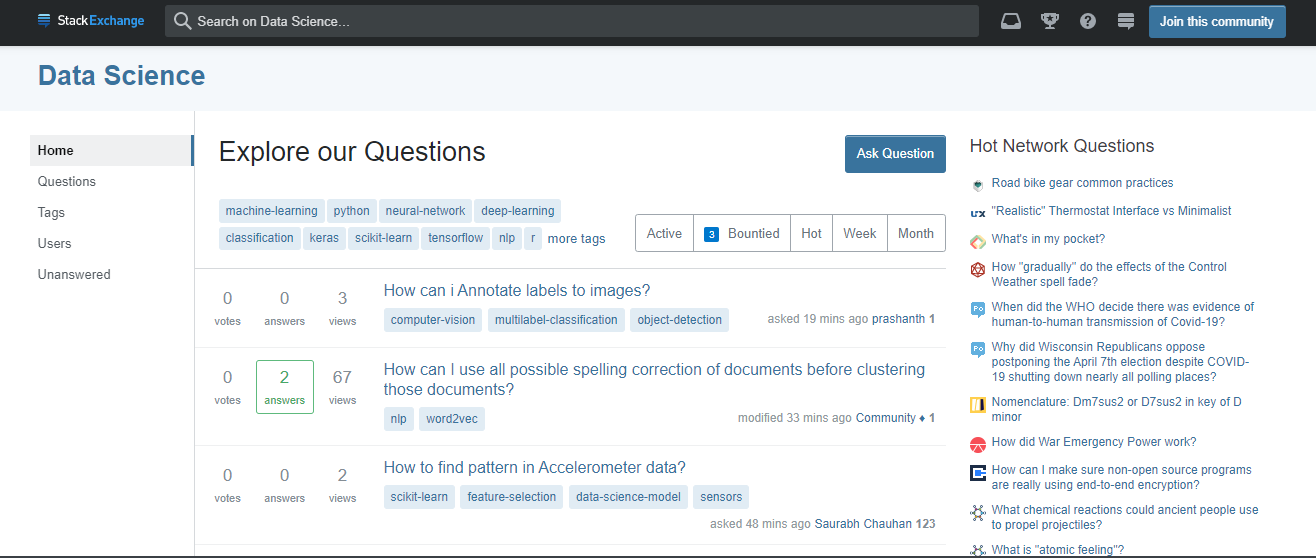

In a given post, the information contained includes:
- question title;
- body of text where the user can specify their question/problem in more detail, eg by sharing their code and the context of the issue;
- a list of responses from other site users, sorted by the number of votes they have received from the other site users who have come across the page;
- related questions; and
- a text box prompting the reader to submit their own answer.


## Accessing data from DSSE

Rather than scraping the website for it's information, Stack Exchange (the name of the overarching network of Q&A sites, only one of which is DSSE) provides a [data exploring platform](https://data.stackexchange.com/datascience/query/new) where we can write SQL queries to fetch data.  

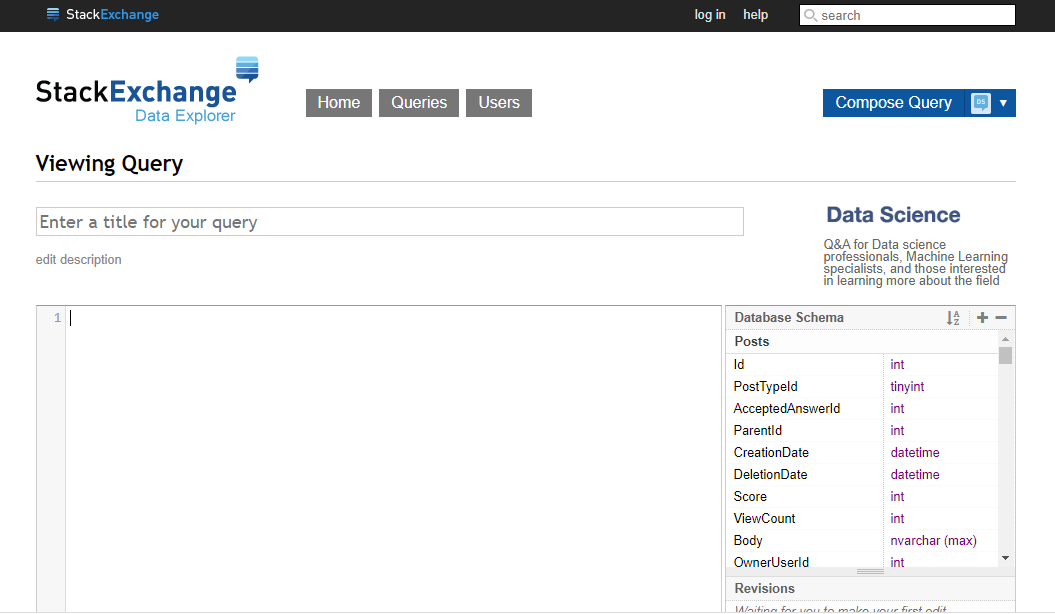

## Initial assessment of DSSE data

Let's have a play around and see if any of the data we can retrieve looks promising for our purposes.  We'll also import our modules while we're at it.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import re

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Plotting
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

### Posts

In [2]:
posts = pd.read_csv("DSSE_posts.csv")

posts.head()

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,LastEditorUserId,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate
0,8837,1,NaN,NaN,2015-11-13 19:16:49,NaN,1,345.0,<p>I have a large number of different XML docu...,6403.0,NaN,NaN,NaN,NaN,2016-01-15 13:47:00,How can I figure out section headings in a doc...,<nlp><text-mining>,1.0,3,NaN,NaN,NaN
1,8838,1,8839.0,NaN,2015-11-13 21:41:18,NaN,1,2462.0,<p>I saw this piece of code in my project:</p>...,10522.0,NaN,NaN,NaN,NaN,2016-04-01 11:56:31,Why do we need to use sysfunc when we call a S...,<sas>,2.0,0,NaN,NaN,NaN
2,8839,2,NaN,8838.0,2015-11-13 23:03:59,NaN,2,NaN,"<p>Without the sysfunc(), the expression will ...",12473.0,NaN,NaN,NaN,NaN,2015-11-13 23:03:59,NaN,NaN,NaN,2,NaN,NaN,NaN
3,8840,1,NaN,NaN,2015-11-14 05:51:38,NaN,2,738.0,<p>I am working on a certain kaggle competitio...,3211.0,NaN,NaN,NaN,NaN,2016-12-11 08:56:01,How many features do you generally use for you...,<scikit-learn>,1.0,0,1.0,2016-12-11 20:46:00,NaN
4,8841,1,NaN,NaN,2015-11-14 05:58:56,NaN,4,1646.0,<p>I am trying to solve a classification probl...,11110.0,NaN,NaN,NaN,NaN,2016-09-10 23:51:18,oversampling plus down sampling using smote no...,<machine-learning><classification><r><unbalanc...,4.0,0,1.0,NaN,NaN


We can see that this table contains details relating to the various posts on the site.  The table has information including title, creation date, tags, view count, number of comments, and responses.  This sounds like a promising place to begin.  We could use this data to assess which topics have received the most discussion.  We could also potentially limit our analysis to recent trends by filtering on the date columns.  The topic of a post could either be obtained from the data in the tags column, or we could potentially try to parse the text from the post titles.  

In [3]:
posts.dtypes

Id                         int64
PostTypeId                 int64
AcceptedAnswerId         float64
ParentId                 float64
CreationDate              object
DeletionDate             float64
Score                      int64
ViewCount                float64
Body                      object
OwnerUserId              float64
OwnerDisplayName          object
LastEditorUserId         float64
LastEditorDisplayName     object
LastEditDate              object
LastActivityDate          object
Title                     object
Tags                      object
AnswerCount              float64
CommentCount               int64
FavoriteCount            float64
ClosedDate                object
CommunityOwnedDate        object
dtype: object

### Tags

In [4]:
tags = pd.read_csv("DSSE_tags.csv")

tags.head()

,Id,TagName,Count,ExcerptPostId,WikiPostId
0,1,definitions,29,105.0,104.0
1,2,machine-learning,7478,4909.0,4908.0
2,3,bigdata,428,66.0,65.0
3,5,data-mining,989,80.0,79.0
4,6,databases,85,8960.0,8959.0


Very interesting indeed!  This table appears to be a summary of all the various tags that have been associated with posts.  We would naturally expect the most frequently occuring tags to indicate topics of particular interest or relevance to users.  The count column in particular tells us how many times each tag has been used, so we can quickly identify those that are the most popular.

In [5]:
tags.sort_values(by=["Count"], ascending=False).head(10)

,Id,TagName,Count,ExcerptPostId,WikiPostId
1,2,machine-learning,7478,4909.0,4908.0
31,46,python,4262,5523.0,5522.0
55,81,neural-network,3109,8885.0,8884.0
108,194,deep-learning,2996,8956.0,8955.0
52,77,classification,2024,4911.0,4910.0
189,324,keras,1903,9251.0,9250.0
81,128,scikit-learn,1416,5896.0,5895.0
186,321,tensorflow,1347,9183.0,9182.0
32,47,nlp,1288,147.0,146.0
18,24,r,1163,49.0,48.0


It seems that machine learning is by far the most used tag - no prizes for having guessed that!  In fact, aside from Python and R, all the other tags in this top 10 refer to topics within machine learning.  To get a sense of the relative popularity of each tag, let's compute some quick summary statistics. 

In [6]:
tags[["TagName", "Count"]].describe()

,Count
count,579.000000
mean,118.685665
std,445.390418
min,1.000000
25%,6.000000
50%,20.000000
75%,63.500000
max,7478.000000


We have many, many tags with very little usage - half of all tags have been used 20 times or less.  The mean number of tags is around 119, and as we saw earlier, the top few tags had been used a few thousand times each.  This is all very indicative of positive skew.  This will be clearer to see with a visual aid...

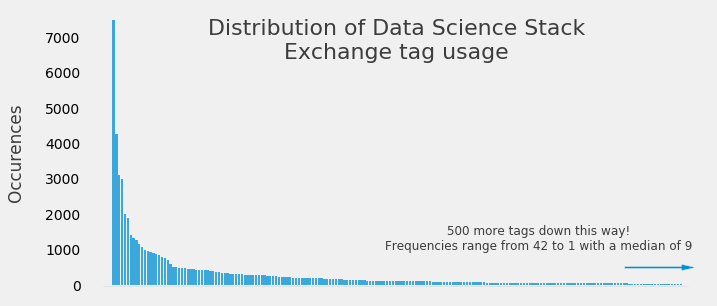

In [7]:
fig, ax = plt.subplots(figsize=(10,5))

# Make the zero line more visible
plt.axhline(y=-10, xmin=0.03, xmax=0.965, color="lightgray", linewidth=0.5)

ax.set_xticks(np.arange(200)+0.75)

ax.bar(np.arange(200)+0.75, tags["Count"].sort_values(ascending=False).iloc[0:200], alpha = .75)

ax.set_xticklabels([])

ax.set_ylabel("Occurences", alpha = .75, labelpad=20)

ax.grid(False)

ax.text(x = 100, y = 6400, s = "Distribution of Data Science Stack\nExchange tag usage",
               fontsize = 22, alpha = .75, ha="center")

ax.text(x = 150, y = 1000, s = "500 more tags down this way!\nFrequencies range from 42 to 1 with a median of 9",
               fontsize = 12, alpha = .75, ha="center")

ax.arrow(180, 500, 20, 0, width=60, head_length=5)

From this simple plot, we can easily see that there are a relatively small number of tags which tend to receive a disproportionate amount of use.  This might be good news for us - relating back to our objectives, we want to produce content that will satisfy as many people as possible.  If high usage of a particular tag indicates that a lot of people are interested in it, then we could satisfy a large number of people even if we just picked a small number of the very popular topics to produce material on.

### TagSynonyms

In [8]:
tag_synonyms = pd.read_csv("DSSE_tag_synonyms.csv")

tag_synonyms.head()

,Id,SourceTagName,TargetTagName,CreationDate,OwnerUserId,AutoRenameCount,LastAutoRename,Score,ApprovedByUserId,ApprovalDate
0,1,spark,apache-spark,2015-07-08 11:45:06,21,37,2020-03-30 22:44:33,0,21.0,2015-07-08 11:45:06
1,2,software-recommendation,software-recommentation,2015-07-31 08:33:01,21,0,NaN,0,NaN,NaN
2,3,pig,apache-pig,2015-08-02 07:36:44,21,1,2016-05-10 16:35:06,0,21.0,2015-08-02 07:36:44
3,4,data-visualization,visualization,2015-11-28 08:55:18,21,7,2019-12-23 20:19:10,0,21.0,2015-11-28 08:55:18
4,5,parallelism,parallel,2016-01-15 22:03:10,21,0,NaN,0,21.0,2016-01-15 22:03:10


This table also looks promising.  One of the problems we might anticipate in our analysis is that a given topic may have several different tags that relate to it.  Since the tags are generated by the user, not every user might label their posts in the same way.  For example, a post relating to neural networks may be labelled with the tag "neuralnetwork" or "nn":

In [9]:
tag_synonyms[tag_synonyms["TargetTagName"] == "neural-network"]

,Id,SourceTagName,TargetTagName,CreationDate,OwnerUserId,AutoRenameCount,LastAutoRename,Score,ApprovedByUserId,ApprovalDate
6,8,neuralnetwork,neural-network,2017-02-22 16:30:33,21,4,2020-01-17 11:43:03,0,21.0,2017-02-22 16:30:33
16,18,nn,neural-network,2019-12-11 11:10:27,38887,0,NaN,0,NaN,NaN


These are not different topics, so we would ideally like to combine all instances of duplicates to improve the accuracy of our calculations and conlcusions.  The full TagSynonyms table is only 19 rows in length, so probably doesn't take into account every single different way of tagging a particular topic, but we could still make use of the information it contains.

In [10]:
print(tags[tags["TagName"] == "neuralnetwork"])
print(tags[tags["TagName"] == "nn"])
print(tags[tags["TagName"] == "data-visualization"])

Empty DataFrame
Columns: [Id, TagName, Count, ExcerptPostId, WikiPostId]
Index: []
Empty DataFrame
Columns: [Id, TagName, Count, ExcerptPostId, WikiPostId]
Index: []
Empty DataFrame
Columns: [Id, TagName, Count, ExcerptPostId, WikiPostId]
Index: []


However, a quick inspection reveals that there aren't any data items in the _Tags_ or _Posts_ tables with the old tag names.  Assuming that _TagSynonyms_ is a historic log of tag names that were changed, we shouldn't have to manually change any of the data.

The rest of the tables available from the Data Explorer platform contain more detailed information about the posts on the site, but detail that is less relevant to our current objectives.  We'll stick with using the two we've identified as being particularly useful - _Tags_ and _Posts_.

## Querying data for analysis from the Data Explorer

Since we want to produce content that is relevant and up-to-date, let's extract only the question posts from 2019.  The bulk of the posts on the site are question and answer posts, and we'll probably have more success looking at the question posts rather than the answers.  By looking at question posts, we can get all kinds of information on how popular the post is - whereas it's not quite as obvious how we could build up our analysis just from data relating to answer posts.  

The different types of posts are identified by the "PostTypes" column.

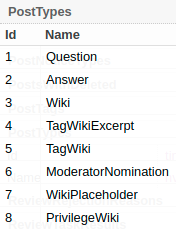

Hence we can query the data we want as follows:

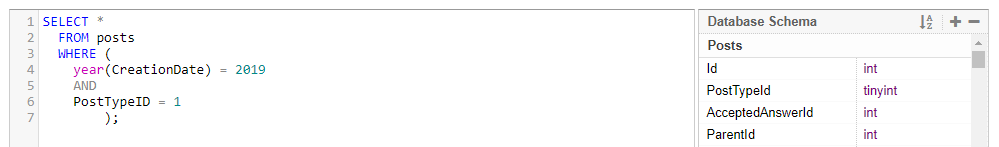

Let's read this into a dataframe and get started.

In [11]:
questions_2019 = pd.read_csv("DSSE_questions_2019.csv")

questions_2019.head()

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,LastEditorUserId,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate
0,60201,1,NaN,NaN,2019-09-14 18:00:57,NaN,1,39,<p>When using the EM algorithm in Gaussian Mix...,79504.0,NaN,NaN,NaN,NaN,2019-09-15 16:23:00,Gaussian Mixture Models Clustering,<machine-learning><optimization><data-science-...,1,0,NaN,NaN,NaN
1,60202,1,NaN,NaN,2019-09-14 18:14:22,NaN,1,32,<p>I am new to reinforcement learning so I apo...,32988.0,NaN,NaN,NaN,NaN,2019-09-14 18:14:22,Deep Q Learning - How is the ground truth obta...,<reinforcement-learning>,0,0,NaN,NaN,NaN
2,60204,1,NaN,NaN,2019-09-14 20:20:36,NaN,3,34,<p>I have two groups of dots that both contain...,82199.0,NaN,82199.0,NaN,2019-09-15 05:38:16,2019-09-15 05:38:16,How to remove noise using morphological filtering,<clustering><unsupervised-learning><image-prep...,0,7,NaN,NaN,NaN
3,60205,1,NaN,NaN,2019-09-14 23:28:38,NaN,1,39,<p>I am implementing L2 regularization in C++ ...,82204.0,NaN,29169.0,NaN,2019-09-14 23:38:11,2019-09-14 23:38:11,Do we need to divide our gradients by batch si...,<machine-learning><regularization><mnist>,0,0,NaN,NaN,NaN
4,60207,1,NaN,NaN,2019-09-15 00:15:02,NaN,2,39,"<p>In short, my query is: Which optimizer(s) s...",79310.0,NaN,83275.0,NaN,2019-11-18 18:24:53,2019-12-19 16:02:00,Optimizer for Function Approximation using Ful...,<machine-learning><neural-network><keras><opti...,1,1,NaN,NaN,NaN


## Data cleaning

To keep our dataframe manageable, let's throw out the columns that we don't have any use for.  We can then check whether the remaining columns have any issues in terms of missing data or weird formatting.

In [12]:
cols_of_interest = [
    "Id",
    "CreationDate",
    "Score",
    "ViewCount",
    "Tags",
    "AnswerCount",
    "FavoriteCount"
]

questions_2019 = questions_2019[cols_of_interest]

questions_2019.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,60201,2019-09-14 18:00:57,1,39,<machine-learning><optimization><data-science-...,1,NaN
1,60202,2019-09-14 18:14:22,1,32,<reinforcement-learning>,0,NaN
2,60204,2019-09-14 20:20:36,3,34,<clustering><unsupervised-learning><image-prep...,0,NaN
3,60205,2019-09-14 23:28:38,1,39,<machine-learning><regularization><mnist>,0,NaN
4,60207,2019-09-15 00:15:02,2,39,<machine-learning><neural-network><keras><opti...,1,NaN


Some quick observations:
- Tags are represented in string form.  Each tag is enclosed by opening and closing brackets, <>; and
- There appear to be missing values in the FavouriteCount column.

Let's dig a bit deeper.

In [13]:
print("Dataframe shape: " + str(questions_2019.shape) + "\n")

print("Summary statistics:\n")

print(questions_2019.describe())

Dataframe shape: (8506, 7)

Summary statistics:

                 Id        Score     ViewCount  AnswerCount  FavoriteCount
count   8506.000000  8506.000000   8506.000000  8506.000000    1482.000000
mean   55000.736539     0.973431    279.250176     0.848225       1.233468
std     6395.272616     1.540746   1335.419790     0.873481       1.079932
min    43363.000000    -2.000000      2.000000     0.000000       0.000000
25%    49446.500000     0.000000     27.000000     0.000000       1.000000
50%    55104.000000     1.000000     54.000000     1.000000       1.000000
75%    60813.500000     1.000000    159.000000     1.000000       1.000000
max    65671.000000    45.000000  63913.000000     9.000000      16.000000


- From the _count_ row of the describe() output, we can see that _FavouriteCount_ is missing 7,024 values.  The other columns appear to be fully populated.
- At least 75% of the posts have a score of less than or equal to 1.

Text(27, 78, '(posts with a score of\n6 or more)')

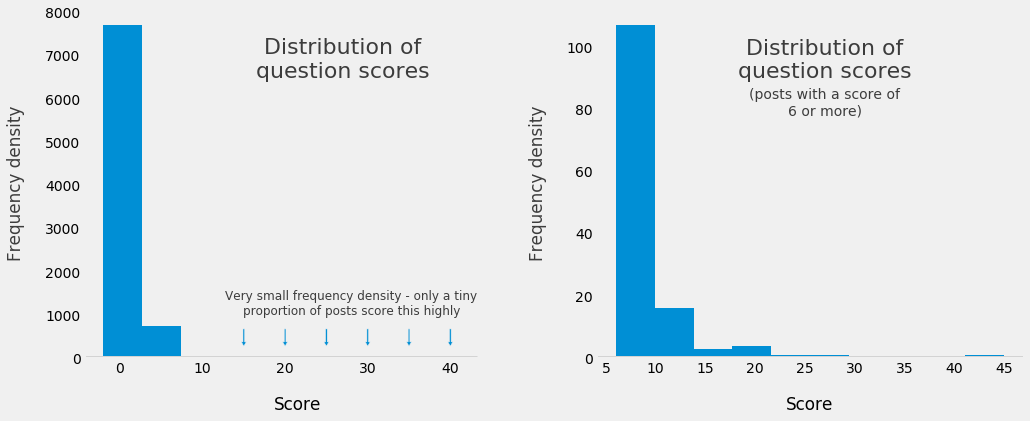

In [14]:
# Set up figure
fig = plt.figure(figsize=(15,6))


# ----- FIRST PLOT -----

# Add pair of axes for plot
ax1 = fig.add_subplot(121)

# Plot histogram of question scores
ax1.hist(questions_2019["Score"])

# Make the zero line more visible
plt.axhline(y=0, xmin=-1, xmax=0.92, color="lightgray", linewidth=5)

# Add x label
ax1.set_xlabel("Score", labelpad=20)

# Add y label
ax1.set_ylabel("Frequency density", alpha = .75, labelpad=20)

# Remove gridlines
ax1.grid(False)

# Add title
ax1.text(x = 27, y = 6500, s = "Distribution of\nquestion scores", fontsize = 22, alpha = .75, ha="center")

# Add additional text
ax1.text(x = 28, y = 1000, s = "Very small frequency density - only a tiny\nproportion of posts score this highly",
            fontsize = 12, alpha = .75, ha="center")

# Add arrows for additional text
for x in [15, 20, 25, 30, 35, 40]:
    ax1.arrow(x, 680, 0, -300, width=0.2, head_length=100)

    
# ----- SECOND PLOT -----

# Add pair of axes for plot
ax2 = fig.add_subplot(122)

# Plot histogram of question scores, but this time only for questions with a score over 5
ax2.hist(questions_2019[questions_2019["Score"] > 5]["Score"])

# Make the zero line more visible
plt.axhline(y=0, xmin=-1, xmax=1, color="lightgray", linewidth=5)

# Set x label
ax2.set_xlabel("Score", labelpad=20)

# Set y label
ax2.set_ylabel("Frequency density", alpha = .75, labelpad=20)

# Remove gridlines
ax2.grid(False)

# Add title
ax2.text(x = 27, y = 90, s = "Distribution of\nquestion scores", fontsize = 22, alpha = .75, ha="center")

# Add subtitle
ax2.text(x = 27, y = 78, s = "(posts with a score of\n6 or more)", fontsize = 14, alpha = .75, ha="center")

In summary, the _Score_ data is highly positively skewed, with the majority of posts scoring less than 6 points and only a small number achieving more.

Text(40000, 38, '(posts with more than\n4000 views)')

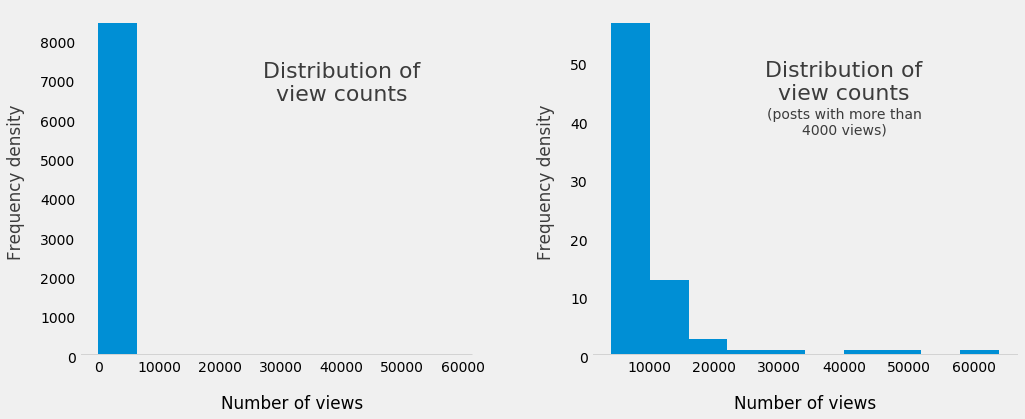

In [15]:
# Set up figure
fig = plt.figure(figsize=(15,6))


# ----- FIRST PLOT -----

# Add pair of axes for plot
ax1 = fig.add_subplot(121)

# Plot histogram of question view counts
ax1.hist(questions_2019["ViewCount"])

# Make the zero line more visible
plt.axhline(y=0, xmin=-1, xmax=0.92, color="lightgray", linewidth=5)

# Add x label
ax1.set_xlabel("Number of views", labelpad=20)

# Add y label
ax1.set_ylabel("Frequency density", alpha = .75, labelpad=15)

# Remove gridlines
ax1.grid(False)

# Add title
ax1.text(x = 40000, y = 6500, s = "Distribution of\nview counts", fontsize = 22, alpha = .75, ha="center")

    
# ----- SECOND PLOT -----

# Add pair of axes for plot
ax2 = fig.add_subplot(122)

# Plot histogram of view counts, but this time only for questions with a view count of over 4000
ax2.hist(questions_2019[questions_2019["ViewCount"] > 4000]["ViewCount"])

# Make the zero line more visible
plt.axhline(y=0, xmin=-1, xmax=1, color="lightgray", linewidth=5)

# Set x label
ax2.set_xlabel("Number of views", labelpad=20)

# Set y label
ax2.set_ylabel("Frequency density", alpha = .75, labelpad=15)

# Remove gridlines
ax2.grid(False)

# Add title
ax2.text(x = 40000, y = 44, s = "Distribution of\nview counts", fontsize = 22, alpha = .75, ha="center")

# Add subtitle
ax2.text(x = 40000, y = 38, s = "(posts with more than\n4000 views)", fontsize = 14, alpha = .75, ha="center")


The _ViewCount_ data is even more positively skewed!  Let's compare the skew of the distributions of _Score_ and _ViewCount_ to confirm.

In [16]:
print("The skew of the Score column is {skew:.1f}".format(skew=questions_2019["Score"].skew()) + ".")
print("The skew of the ViewCount column is {skew:.1f}".format(skew=questions_2019["ViewCount"].skew()) + ".")

s = np.random.normal(0,1,100)

from scipy.stats import skew

print("\nFor comparison, the skew of a random sample of 100 observations from a standard normal distribution is {skew:.1f}."
      .format(skew=skew(s)))

The skew of the Score column is 6.4.
The skew of the ViewCount column is 25.4.

For comparison, the skew of a random sample of 100 observations from a standard normal distribution is 0.4.


## Addressing missing values

Let's think about what we can do with the missing values in the FavouriteCount column.  The exisitng values range from zero to 16.  We are missing a _lot_ of values, but we do have a reasonable number of values present to make an educated guess about what values the missing ones could take.

Referring to our summary statistics from earlier:

In [17]:
print(questions_2019["FavoriteCount"].describe())

count    1482.000000
mean        1.233468
std         1.079932
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        16.000000
Name: FavoriteCount, dtype: float64


We can see that the median and both quartiles have a value of 1.  This indicates that at least half of the present values are equal to 1.  The mean is only slightly different from 1, so there can't be many values that are higher or lower.  Let's count up how many occurences there are of each value.

In [18]:
questions_2019["FavoriteCount"].value_counts()

1.0     991
2.0     220
0.0     178
3.0      48
4.0      20
5.0       8
6.0       7
7.0       5
9.0       2
10.0      1
16.0      1
12.0      1
Name: FavoriteCount, dtype: int64

991 out of the 1,482 values are equal to 1.  The most part of the remaining values are either 2's or 0's, so replacing them with 1's probably wouldn't have a dramatic effect on the validity of our conclusions.  So, let's replace the missing values with 1's.  

We're implicitly assuming here that the present data has the same distribution and features as the true values of the missing data.  The missing values vastly outnumber the present ones, so this may well be incorrect.  Let's fill in the missing values for the sake of completing the dataframe, but let's also be careful when drawing conclusions using this imputed data.  

In the worst case scenario, we can always just discard this column.  Thinking in terms of what the FavouriteCount actually represents, it would be reasonable to say a high favourite count correlates with a popular and interesting post.  However, we have plenty of other ways of identifying popular posts:

- We can see the number of views a post has.
- We can see the number of answers a post has to gauge how much discussion is being generated.
- We can see the score of the post to judge the community's sentiment about a post and its topic.

So really, are we losing much by throwing out a column which is unlikely to provide any new insight?

In [19]:
questions_2019["FavoriteCount"] = questions_2019["FavoriteCount"].fillna(1)

questions_2019["FavoriteCount"].value_counts()

1.0     8015
2.0      220
0.0      178
3.0       48
4.0       20
5.0        8
6.0        7
7.0        5
9.0        2
10.0       1
16.0       1
12.0       1
Name: FavoriteCount, dtype: int64

## Data types

In [20]:
questions_2019.dtypes

Id                 int64
CreationDate      object
Score              int64
ViewCount          int64
Tags              object
AnswerCount        int64
FavoriteCount    float64
dtype: object

Observations:

- We should probably convert the values in the CreationDate column to datetime objects to make them easier to work with
- The values in the FavoriteCount column are all integers, so we should use the appropriate int data type.

In [21]:
questions_2019["CreationDate"] = pd.to_datetime(questions_2019["CreationDate"])

questions_2019["FavoriteCount"] = questions_2019["FavoriteCount"].astype(int)

questions_2019.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int32
dtype: object

## Regularise data from Tags column

We saw earlier that the tags of each post are stored in a particular format, with each tag encompassed by <> brackets.

In [22]:
questions_2019["Tags"].head()

0    <machine-learning><optimization><data-science-...
1                             <reinforcement-learning>
2    <clustering><unsupervised-learning><image-prep...
3            <machine-learning><regularization><mnist>
4    <machine-learning><neural-network><keras><opti...
Name: Tags, dtype: object

Is there a better way of storing these data?  One solution is to replace each value with a list of tags.  Another solution would be to split the data into multiple columns: Tag1, Tag2, Tag3, ...

To help us decide, let's count how many tags each post has. 

In [23]:
tag_numbers = questions_2019["Tags"].str.count("<").value_counts().sort_index(ascending=False)

tag_numbers

5    1315
4    1714
3    2373
2    2028
1    1076
Name: Tags, dtype: int64

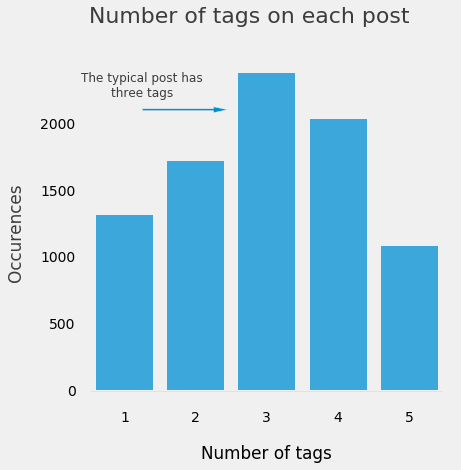

In [24]:
fig, ax = plt.subplots(figsize=(6,6))

# Make the zero line more visible
plt.axhline(y=-10, xmin=0.03, xmax=0.965, color="lightgray", linewidth=0.5)

ax.set_xticks(np.arange(200)+0.75)

ax.bar(np.arange(5)+0.75, tag_numbers, alpha = .75)

ax.set_xticklabels(np.arange(1,6))

ax.set_xlabel("Number of tags", labelpad=20)

ax.set_ylabel("Occurences", alpha = .75, labelpad=15)

ax.grid(False)

ax.text(x = 2.5, y = 2750, s = "Number of tags on each post",
               fontsize = 22, alpha = .75, ha="center")

ax.text(x = 1, y = 2200, s = "The typical post has\nthree tags",
        fontsize = 12, alpha = .75, ha="center")

ax.arrow(1, 2100, 1, 0, width=15, head_length=0.2)

We don't really want to have to add five extra columns to our dataframe - that would make it bigger and harder to work with.  However, it could make the subsequent analysis easier, so let's take a temporary copy of our dataframe and split it into the five columns.

In [25]:
questions_2019["Tags"] = questions_2019["Tags"].str.replace("<","").str.replace(">",",")

tags_2019 = questions_2019["Tags"].copy()

tags_2019_split = tags_2019.str.split(",", expand=True)

tags_2019_split.head()

,0,1,2,3,4,5
0,machine-learning,optimization,data-science-model,expectation-maximization,gmm,
1,reinforcement-learning,,None,None,None,None
2,clustering,unsupervised-learning,image-preprocessing,noise,,None
3,machine-learning,regularization,mnist,,None,None
4,machine-learning,neural-network,keras,optimization,,None


## Analysing tag data

Let's count the number of times each tag is used, and how many times posts with each tag were viewed.

### Popularity of tags

For the number of times each tag was used, let's sum together the value_counts() of each column in tags_2019.

In [26]:
tag_frequencies_2019= tags_2019_split.apply(pd.Series.value_counts).sum(axis=1)

tag_frequencies_2019

                       8506.0
.net                      1.0
3d-object-detection       1.0
3d-reconstruction         9.0
ab-test                   6.0
                        ...  
word                      2.0
word-embeddings         115.0
word2vec                 83.0
xgboost                 161.0
yolo                     20.0
Length: 518, dtype: float64

The top row displayed here is counting the blank entries in our expanded tags dataframe, which isn't useful to us.  Let's discard it and see what results we have.

In [27]:
tag_frequencies_2019 = tag_frequencies_2019[1:].sort_values(ascending=False)

Text(250, 2500, 'Popularity of DSSE tags')

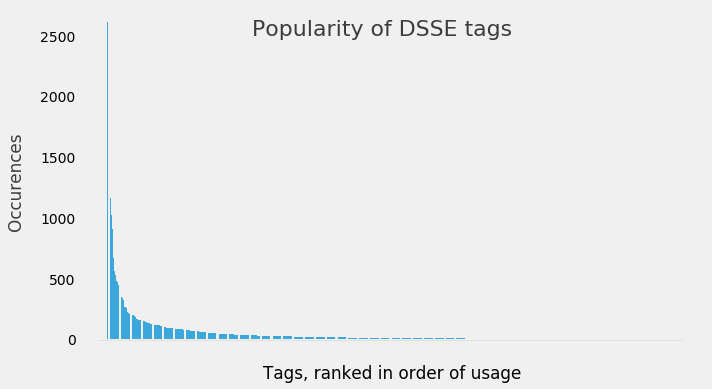

In [28]:
fig, ax = plt.subplots(figsize=(10,6))

# Make the zero line more visible
plt.axhline(y=-10, xmin=0.03, xmax=0.965, color="lightgray", linewidth=0.5)

ax.set_xticks(np.arange(517)+0.75)

ax.bar(np.arange(517)+0.75, tag_frequencies_2019.values, alpha = .75)

ax.set_xticklabels([])

ax.set_xlabel("Tags, ranked in order of usage")

ax.set_ylabel("Occurences", alpha = .75, labelpad=15)

ax.grid(False)

ax.text(x = 250, y = 2500, s = "Popularity of DSSE tags",
               fontsize = 22, alpha = .75, ha="center")

Wow!  It seems like we have a super-steep peak at the very left edge of the distribution which falls off rapidly.  The majority of tags garner very little usage relative to the celebrity-type tags.  Let's zoom in on the left side of this plot and identify the most popular tags.

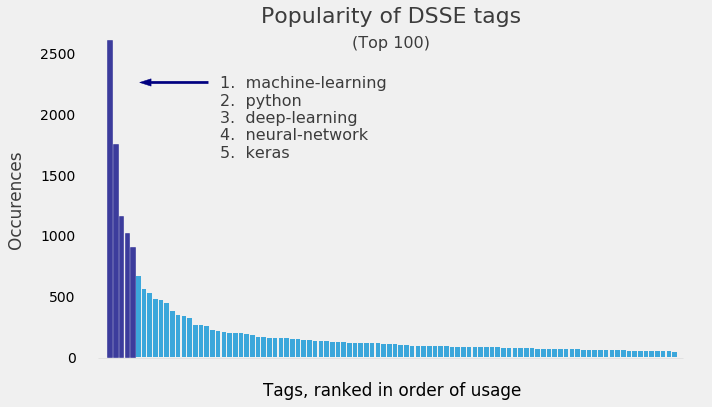

In [29]:
fig, ax = plt.subplots(figsize=(10,6))

# Make the zero line more visible
plt.axhline(y=-10, xmin=0.03, xmax=0.965, color="lightgray", linewidth=0.5)

ax.set_xticks(np.arange(100)+0.75)

barlist = ax.bar(np.arange(100)+0.75, tag_frequencies_2019.values[0:100], alpha = .75)

ax.set_xticklabels([])

ax.set_xlabel("Tags, ranked in order of usage")

ax.set_ylabel("Occurences", alpha = .75, labelpad=15)

ax.grid(False)

ax.text(x = 50, y = 2750, s = "Popularity of DSSE tags",
               fontsize = 22, alpha = .75, ha="center")

ax.text(x = 50, y = 2550, s = "(Top 100)",
        fontsize = 16, alpha = .75, ha="center")

# Label the top 5
s = []

for n in range(5):
    t = tag_frequencies_2019.index[n]
    s.append(str(n+1) + ".  " + t + "\n")

ax.text(x = 20, y = 1500, s = "".join(s),
        fontsize = 16, alpha = .75, ha="left")

for bar in barlist[0:5]:
    bar.set_color("navy")

ax.arrow(18, 2260, -10, 0, width=20, head_length=2, color="navy")

Some definitions for the uninitiated:

- _Machine Learning_ is a field within artificial intellignece that focuses on algorithms that can improve themselves over time as they are fed more data
- _Python_ is the programming language that this notebook is written in!  
- _Deep Learning_ is a type of machine learning that works with unstructured or unlabelled data
- A _neural network_ is a type of algorithm that can "learn" to recognise patterns, modelled loosely after how neurons fire in the brain
- _Keras_ is a deep learning library for Python.

### Total view count of posts with each tag

Let's add view count to our earlier dataframe.

In [30]:
tags_views_2019 = pd.concat([tags_2019, questions_2019["ViewCount"]], axis=1)

tags_views_2019.head()

,Tags,ViewCount
0,"machine-learning,optimization,data-science-mod...",39
1,"reinforcement-learning,",32
2,"clustering,unsupervised-learning,image-preproc...",34
3,"machine-learning,regularization,mnist,",39
4,"machine-learning,neural-network,keras,optimiza...",39


In [31]:
names = []
views = []

for tag in tag_frequencies_2019.iteritems():
    name = tag[0]
    names.append(name)
    view = tags_views_2019[tags_views_2019["Tags"].str.contains(re.escape(tag[0]))]["ViewCount"].sum()
    views.append(view)

In [32]:
views_per_tag_2019 = pd.DataFrame(list(zip(names, views)), columns=["Tag", "Total views"])

views_per_tag_2019.head()

,Tag,Total views
0,machine-learning,602950
1,python,889279
2,deep-learning,346144
3,neural-network,281778
4,keras,410507


Great!  Let's sort the data by view count to see what the most popular tags are by this measure.  Let's also make another plot like before so we can visualise the relative popularities.

In [33]:
views_per_tag_2019 = views_per_tag_2019.sort_values(by="Total views", ascending=False)

views_per_tag_2019.head()

,Tag,Total views
16,r,1991248
407,c,1630760
1,python,889279
255,learning,849322
0,machine-learning,602950


Text(250, 1900000.0, 'Popularity of DSSE tags')

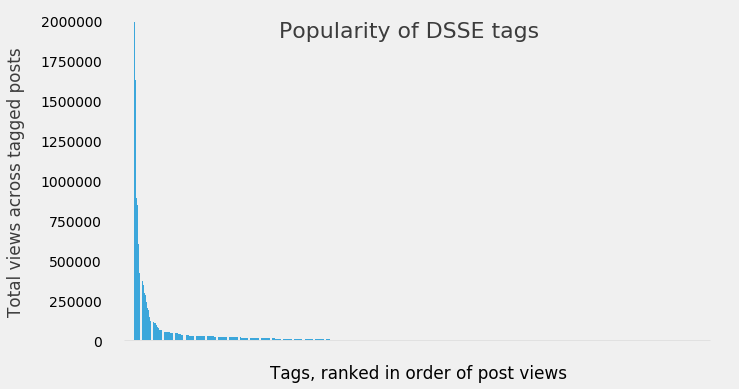

In [34]:
fig, ax = plt.subplots(figsize=(10,6))

# Make the zero line more visible
plt.axhline(y=-10, xmin=0.03, xmax=0.965, color="lightgray", linewidth=0.5)

ax.set_xticks(np.arange(517)+0.75)

ax.bar(np.arange(517)+0.75, views_per_tag_2019["Total views"], alpha = .75)

ax.set_xticklabels([])

ax.set_xlabel("Tags, ranked in order of post views")

ax.set_ylabel("Total views across tagged posts", alpha = .75, labelpad=15)

ax.grid(False)

ax.text(x = 250, y = 1.9E6, s = "Popularity of DSSE tags",
               fontsize = 22, alpha = .75, ha="center")

As before, the distribution is super-steep.  Again, let's zoom in on the left side - these are the tags with the most views across all posts and hence the ones we're most likely to be interested in.

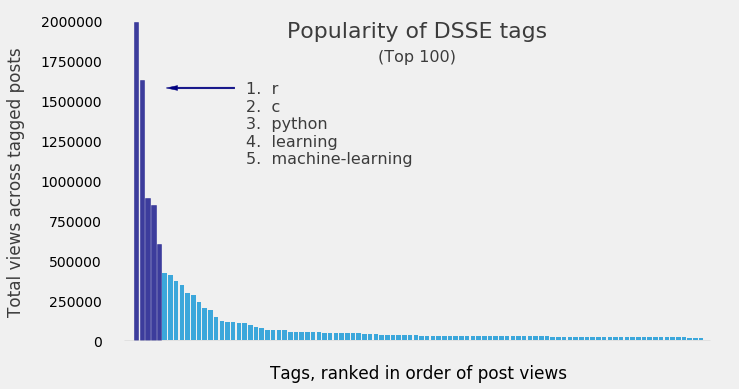

In [35]:
fig, ax = plt.subplots(figsize=(10,6))

# Make the zero line more visible
plt.axhline(y=-10, xmin=0.03, xmax=0.965, color="lightgray", linewidth=0.5)

ax.set_xticks(np.arange(100)+0.75)

barlist = ax.bar(np.arange(100)+0.75, views_per_tag_2019["Total views"].iloc[0:100], alpha = .75)

ax.set_xticklabels([])

ax.set_xlabel("Tags, ranked in order of post views")

ax.set_ylabel("Total views across tagged posts", alpha = .75, labelpad=15)

ax.grid(False)

ax.text(x = 50, y = 1.9E6, s = "Popularity of DSSE tags",
               fontsize = 22, alpha = .75, ha="center")

ax.text(x = 50, y = 1.75E6, s = "(Top 100)",
        fontsize = 16, alpha = .75, ha="center")

# Label the top 5
t = views_per_tag_2019["Tag"].iloc[0:100]
s = []

for n in range(5):
    t = views_per_tag_2019["Tag"].iloc[n]
    s.append(str(n+1) + ".  " + t + "\n")

ax.text(x = 20, y = 1E6, s = "".join(s),
        fontsize = 16, alpha = .75, ha="left")

for bar in barlist[0:5]:
    bar.set_color("navy")

ax.arrow(18, 1.58E6, -10, 0, width=10000, head_length=2, color="navy")

Interesting!  The top 5s aren't as identical as we might have expected.  Let's compare the top 10 most popular tags from each approach.  To go one step further, let's also calculate the percentage of the total tags/views that each tag represents so we can see what proportions they make up.

#### Tag usage proxy

In [36]:
tag_frequencies_2019 = pd.DataFrame(tag_frequencies_2019, columns=["Number of tags"])

tag_frequencies_2019["Number of tags"] = tag_frequencies_2019["Number of tags"].astype(int)

tag_frequencies_2019["Percentage of total"] = round(tag_frequencies_2019["Number of tags"] * 100 / 
                                                    tag_frequencies_2019["Number of tags"].sum(), 1)

tag_frequencies_2019.head(10)

,Number of tags,Percentage of total
machine-learning,2607,10.2
python,1752,6.8
deep-learning,1162,4.5
neural-network,1024,4.0
keras,905,3.5
classification,666,2.6
tensorflow,561,2.2
scikit-learn,524,2.0
nlp,477,1.9
cnn,468,1.8


#### Total views across tagged posts proxy

In [37]:
views_per_tag_2019["Total views"] = round(views_per_tag_2019["Total views"], -2)

views_per_tag_2019["Percentage of total"] = round(views_per_tag_2019["Total views"] * 100 / 
                                                  views_per_tag_2019["Total views"].sum(), 1)

views_per_tag_2019.head(10)

,Tag,Total views,Percentage of total
16,r,1991200,14.9
407,c,1630800,12.2
1,python,889300,6.6
255,learning,849300,6.3
0,machine-learning,603000,4.5
21,data,422400,3.2
4,keras,410500,3.1
12,pandas,374000,2.8
2,deep-learning,346100,2.6
207,neural,295300,2.2


Ok!  Now let's try and distill some insight from these results.

## Analysis

### Most tagged posts

- 9 out of the top 10 most used tags relate to machine learning in some form (all besides from Python);
- The most popular sub-fields of machine learning appear to be:
    - deep learning; 
    - neural networks (including convolutional neural networks, or cnns);
    - classification; and
    - natural language processing (nlp);
- Python is the language with the highest number of tags, suggesting popularity.  The next most tagged programming language is R, with 262 tags compared to Python's 1,752;
- The most tagged libraries are Keras, TensorFlow, and scikit-learn.

_Assuming_ that the popularity of tags correlates with "actual popularity", which for our purposes means that people would be willing to consume our content on the topic, machine learning appears to be an obvious choice.  Machine learning and related subfields dominate the top 10 here.  We also have some suggestions for particular subfields that people appear to be interested in, and some libraries that people appear to use frequently.  Python also appears to be the best language to use for our content - it was tagged way more than any other language.

### Tags with most views across posts

- As before, we see machine-learning and its related subfields scoring highly in terms of total views - although it is less dominant here.  Machine learning itself ranks fifth in terms of popularity.  "Learning", "deep-learning", "keras" and "neural" are the other popular topics which relate to machine learning.
- We get a different story in terms of the most popular programming language.  This time, R comes out on top, followed closely by C.  Both of these languages are around twice as popular as Python in terms of the proportion of views their posts get.
- Keras and pandas appear to be the most popular libraries (both Python libraries).
- "Data" is also a popular tag, but it's hard to tell at this point what type of post this specifically relates to.  This is Data Science Stack Exchange, after all - all the posts should relate to data in some form!

Machine learning again appears to be a popular subject, although it's interesting to note that it doesn't dominate the top 10 in the same way as with our other proxy for popularity.  The most interesting and perhaps significant discovery here is that R and C would appear to be more popular than Python as programming languages, which contradicts our earlier thinking that Python would be the best language to focus on in our content.  Keras has appeared again in the top 10, which suggests it's a library that is popular and one that people would presumably like to learn more about through our content.

## Popularity across time

We've analysed data from 2019 to come up with the above insights.  Is it possible that some of these topics are in fashion at the moment but could drop out of people's interests at some point in the future?  It would be a shame to invest time, effort and money into creating content on a subject that wouldn't be of interest to people in a few months' time.  

From the analysis of 2019 posts, it would appear that machine learning is an absolute hit.  But has its popularity been sustained, and will it continue into the future?  Let's expand the scope of our analysis to all questions (not just those from 2019) and track machine learning's popularity across time.  This could help us decide whether we think machine learning as a topic will have the longevity to make producing content on it a worthwhile investment.

### Getting data

We'll go back to the DSSE Data Explorer for the data.

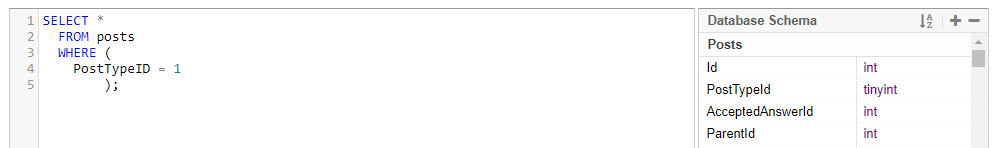

In [38]:
all_questions = pd.read_csv("DSSE_all_questions.csv", parse_dates=["CreationDate"])

all_questions = all_questions[all_questions["Tags"].str.contains("machine-learning")]

all_questions = all_questions[["Id", "CreationDate", "ViewCount"]]

all_questions.head()

,Id,CreationDate,ViewCount
3,8841,2015-11-14 05:58:56,1646
6,8850,2015-11-15 15:06:41,1124
7,8853,2015-11-16 01:53:50,44
8,8855,2015-11-16 08:15:55,114
10,8860,2015-11-16 14:41:08,8740


### Data manipulation

Let's examine the data on a monthly basis, ie let's use a proxy for the topic's popularity in a given month and track that across time.  If we went to a much finer-grained level, eg tracking posts on a daily basis, then our data might exhibit a lot of day-to-day variation.  This would have the potential to distract us from the _global_ trend in popularity, which is what is important to us at the moment.

In [39]:
all_questions["YearMonth"] = all_questions["CreationDate"].map(lambda x: x.year*100 + x.month)

all_questions.head()

,Id,CreationDate,ViewCount,YearMonth
3,8841,2015-11-14 05:58:56,1646,201511
6,8850,2015-11-15 15:06:41,1124,201511
7,8853,2015-11-16 01:53:50,44,201511
8,8855,2015-11-16 08:15:55,114,201511
10,8860,2015-11-16 14:41:08,8740,201511


In [40]:
# Group by YearMonth - we want to retain the total number of questions in each year and month, and the total number of views
# across those question posts.
monthly_question_counts = all_questions.groupby("YearMonth").size().to_frame("Total Posts")

# Data for April 2020 is incomplete as at time of writing - remove
monthly_question_counts = monthly_question_counts.iloc[:-1]

monthly_question_counts.head()

,Total Posts
YearMonth,
201405,10
201406,31
201407,23
201408,19
201409,19


In [41]:
monthly_question_views = all_questions.groupby("YearMonth").sum()

# Sum of Id colums is meaningless, so discard
monthly_question_views = monthly_question_views["ViewCount"]

# Data for April 2020 is incomplete as at time of writing - remove
monthly_question_views = monthly_question_views[:-1]

monthly_question_views

YearMonth
201405     34079
201406    342018
201407    371243
201408     75263
201409     41026
           ...  
201911     16227
201912     18335
202001     24159
202002      7230
202003      6860
Name: ViewCount, Length: 71, dtype: int64

In [42]:
# Inspect earliest and latest CreationDates
print(all_questions["CreationDate"].min())
print(all_questions["CreationDate"].max())

2014-05-13 23:58:30
2020-04-12 00:21:46


If we have data for every month from May 2014 to March 2020, that would give us:
- 8 months of data from 2014;
- 5 full years of data from 2015 to 2019 inclusive, so 60 months; and
- 3 months of data from 2020.

This is 71 months in total.  Hence, we would expect 71 rows of data.

In [43]:
print(monthly_question_counts.shape)
print(monthly_question_views.shape)

(71, 1)
(71,)


Great!  We have enough data to populate every month and year in our data.  If we had missing months (resulting from months where no questions were asked on machine learning), we would have had to do some additional work before plotting - but we've been spared.

Data Science Stack Exchange was created in May 2014 (the site's age is available [here](https://stackexchange.com/sites?view=list#oldest)).  Hence, it's important to note that our understanding of the popularity of machine learning as a topic will be limited by the fact that our data only goes back this far.  Just because there were no questions before 2014 doesn't mean that no-one was talking about machine learning!  The inital data shortly after the site opened may not be reliable as the site probably would have needed some time to attract a userbase.  Additionally, the growing popularity of the DSSE site itself may inflate our data over time - as the userbase grows, we would naturally expect more discussions, even on topics with a relatively steady level of popularity. 

### Plotting and analysis

Caveats in place, let's visualise what we've found.

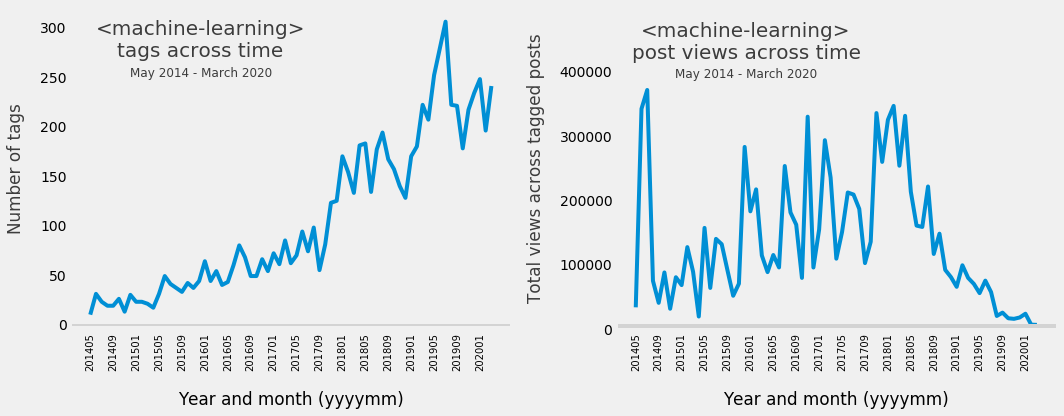

In [44]:
# Set up figure
fig = plt.figure(figsize=(15,6))


# ----- FIRST PLOT -----

# Add pair of axes for plot
ax1 = fig.add_subplot(121)

ax1.plot(np.arange(71) + 0.75, monthly_question_counts.values)

plt.xticks(np.arange(0,71,4) + 0.75, fontsize=10, rotation=90)

ax1.set_xticklabels(monthly_question_counts.index[::4])

# Make the zero line more visible
plt.axhline(y=0, xmin=0, xmax=1, color="lightgray", linewidth=2)

# Add x label
ax1.set_xlabel("Year and month (yyyymm)", labelpad=20)

# Add y label
ax1.set_ylabel("Number of tags", alpha = .75, labelpad=15)

# Remove gridlines
ax1.grid(False)

# Add title
ax1.text(x = 20, y = 270, s = "<machine-learning>\ntags across time", fontsize = 20, alpha = .75, ha="center")

# Add additional text
ax1.text(x = 20, y = 250, s = "May 2014 - March 2020",
            fontsize = 12, alpha = .75, ha="center")


# # ----- SECOND PLOT -----

# Add pair of axes for plot
ax2 = fig.add_subplot(122)

ax2.plot(np.arange(71) + 0.75, monthly_question_views.values)

plt.xticks(np.arange(0,71,4) + 0.75, fontsize=10, rotation=90)

ax2.set_xticklabels(monthly_question_views.index[::4])

# Make the zero line more visible
plt.axhline(y=0, xmin=0, xmax=1, color="lightgray", linewidth=10)

# Add x label
ax2.set_xlabel("Year and month (yyyymm)", labelpad=20)

# Add y label
ax2.set_ylabel("Total views across tagged posts", alpha = .75, labelpad=15)

# Set ylimit
ax2.set_ylim((-2,4.999E5))

# Remove gridlines
ax2.grid(False)

# Add title
ax2.text(x = 20, y = 4.2E5, s = "<machine-learning>\npost views across time", fontsize = 20, alpha = .75, ha="center")

# Add additional text
ax2.text(x = 20, y = 3.9E5, s = "May 2014 - March 2020",
            fontsize = 12, alpha = .75, ha="center")


# Adjust spacing between subplots
fig.tight_layout()

Okay - the left plot looks good, but the one on the right is a bit crazy!  It seems like there's major variation across months for the total number of views posts tagged with machine-learning recieve.  Let's try that again, but this time plotting a cumulative sum of the views across time.  This might make it easier to identify a trend.  

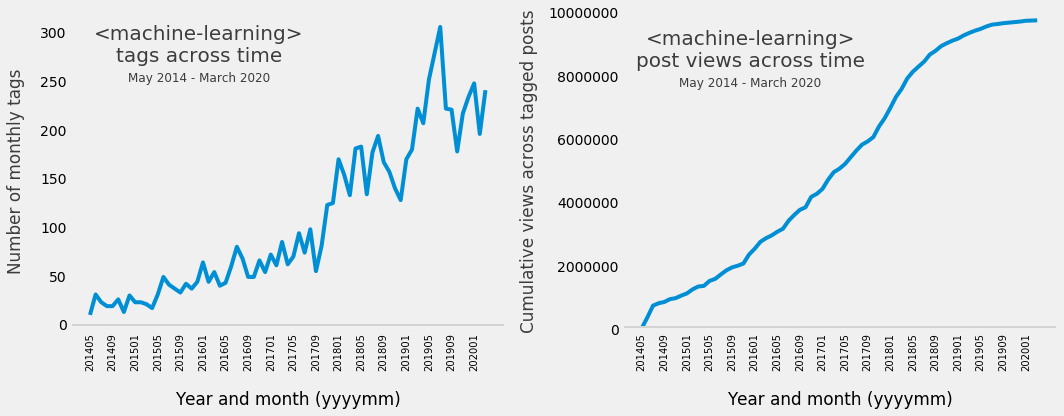

In [45]:
# Set up figure
fig = plt.figure(figsize=(15,6))


# ----- FIRST PLOT -----

# Add pair of axes for plot
ax1 = fig.add_subplot(121)

ax1.plot(np.arange(71) + 0.75, monthly_question_counts.values)

plt.xticks(np.arange(0,71,4) + 0.75, fontsize=10, rotation=90)

ax1.set_xticklabels(monthly_question_counts.index[::4])

# Make the zero line more visible
plt.axhline(y=0, xmin=0, xmax=1, color="lightgray", linewidth=2)

# Add x label
ax1.set_xlabel("Year and month (yyyymm)", labelpad=20)

# Add y label
ax1.set_ylabel("Number of monthly tags", alpha = .75, labelpad=15)

# Remove gridlines
ax1.grid(False)

# Add title
ax1.text(x = 20, y = 270, s = "<machine-learning>\ntags across time", fontsize = 20, alpha = .75, ha="center")

# Add additional text
ax1.text(x = 20, y = 250, s = "May 2014 - March 2020",
            fontsize = 12, alpha = .75, ha="center")


# # ----- SECOND PLOT -----

# Add pair of axes for plot
ax2 = fig.add_subplot(122)

ax2.plot(np.arange(71) + 0.75, monthly_question_views.values.cumsum())

plt.xticks(np.arange(0,71,4) + 0.75, fontsize=10, rotation=90)

ax2.set_xticklabels(monthly_question_views.index[::4])

# Make the zero line more visible
plt.axhline(y=0, xmin=0, xmax=1, color="lightgray", linewidth=7)

# Add x label
ax2.set_xlabel("Year and month (yyyymm)", labelpad=20)

# Add y label
ax2.set_ylabel("Cumulative views across tagged posts", alpha = .75, labelpad=10)

# Set y-axis limits
ax2.set_ylim((-0.1,1E7))

# Prevent y-axis labels from using scientific notation
plt.ticklabel_format(style='plain', axis="y")

# Remove gridlines
ax2.grid(False)

# Add title
ax2.text(x = 20, y = 8.3E6, s = "<machine-learning>\npost views across time", fontsize = 20, alpha = .75, ha="center")

# Add additional text
ax2.text(x = 20, y = 7.65E6, s = "May 2014 - March 2020",
            fontsize = 12, alpha = .75, ha="center")


# Adjust spacing between subplots
fig.tight_layout()

That's much better.  As we saw from our earlier analysis, the number of views that posts tend to receive has a highly skewed distribution and it seems that this was contributing to a very jagged line when looking at monthly views across posts with the machine-learning tag.  Presenting the data as a cumulative sum results in a much smoother curve - although we need to ensure that our audience knows that we've transformed the data and understands how it can be interpreted.

- The use of the machine-learning tag is increasing over time.  We would need to do further analysis to say for certain, but it looks like the rate of growth has been picking up in recent years.
- The graph of cumulative views across time shows strong growth in the popularity of machine learning since 2014, and it seems like the rate of growth had been picking up - until the curve begins to level off in 2018.  This indicates that posts tagged with machine-learning aren't getting as many views as before.  This is despite the consideration that there is an increasing number of machine-learning posts in recent months and years.  
- On the whole, we have seen that if we use tag usage as a proxy for popularity, machine learning is extremely popular and seems to be becoming increasingly so.  However, if we use post views as a proxy, machine learning isn't as dominant (although still undeniably popular) and may even be losing some of its popularity, judging by the decreasing rate at which these types of posts are being viewed.

Of course, we have only condsidered one source of data which has its particular limitations.  We should analyse data from other sources to see if we find similar trends.  We should also continue to monitor the evolution of the trends we have found on DSSE, perhaps every time a new month of data becomes available.  DSSE is an active site and perhaps we will see either a continuation or a reversal of the trend in cumulative post views.

## Conclusions and next steps

- We explored data from Data Science Stack Exchange, a data science-themed question-and-answer site, to try to answer the questions: what type of data science content is the most popular?  What topics should we produce content on?
- Posts on DSSE have attaching "tags" to show what topics they relate to.  We used frequency of tag usage and number of views across tagged posts as proxies for popularity to analyse which topics interested people the most.
- Machine learning and its related subfields featured heavily in the most popular tags.  Posts relating to libraries such as Keras also recieve a lot of attention.  The most popular programming languages are Python, R, and C.
- We explored the popularity of machine learning across time to see whether it will continue to increase in popularity.  Frequency of tag usage indicated a growth in popularity, whereas looking at the cumulative views across time of machine learning-related posts showed that its popularity could be levelling off.
- We will continue to update this analysis as more data becomes available.  We'll also repeat the analysis using other sources of data to see if we reach the same conclusions.

Thanks for reading all the way to the end.  Have a great day!